# モジュールのインポート

In [153]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import japanize_matplotlib

# データベースへの接続

In [154]:

conn = sqlite3.connect('suumo_data.db')
query = """
SELECT 
    age AS 築年数,
    size AS 専有面積
FROM 
    properties
WHERE 
    age IS NOT NULL AND size IS NOT NULL;
"""
df = pd.read_sql(query, conn)
conn.close()

# 前処理

In [155]:
def preprocess_age(age):
    if age == "新築":
        return 0
    elif "築" in age:
        if "以上" in age:
            return 99  # 「99年以上」は99年と扱う
        return int(age.replace("築", "").replace("年", ""))
    return None

# データの整形
df['築年数'] = df['築年数'].apply(preprocess_age)
df['築年数'] = df['築年数'].apply(lambda x: 99 if x >= 99 else x)
df['専有面積'] = df['専有面積'].str.replace("m2", "").astype(float)


# 分析クラスの定義

In [156]:
class PropertyAnalysis:
    def __init__(self, df):
        self.df = df
        self.model = None

    def plot_scatter(self):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='築年数', y='専有面積', data=self.df)
        plt.title('築年数と専有面積の関係')
        plt.xlabel('築年数')
        plt.ylabel('専有面積')
        plt.show()

    def perform_regression(self):
        X = self.df['築年数']
        y = self.df['専有面積']
        X = sm.add_constant(X)
        self.model = sm.OLS(y, X).fit()
        print(self.model.summary())

    def get_regression_results(self):
        if self.model is None:
            raise ValueError("回帰分析が実行されていません。")
        coef = self.model.params['築年数']
        p_value = self.model.pvalues['築年数']
        print(f"回帰係数: {coef}")
        print(f"p値: {p_value}")
        return coef, p_value

    def calculate_correlation(self):
        correlation_coefficient, p_value = pearsonr(self.df['築年数'], self.df['専有面積'])
        print(f"築年数と専有面積の相関係数: {correlation_coefficient:.2f}")
        print(f"p値: {p_value:.4f}")
        return correlation_coefficient, p_value


In [157]:
analysis = PropertyAnalysis(df)

# 散布図を表示


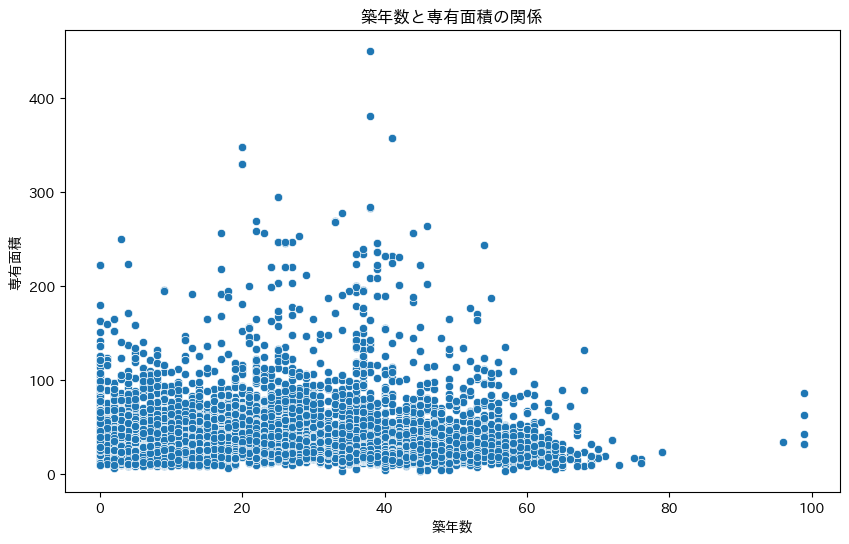

In [158]:
analysis.plot_scatter()

# 回帰分析を実効

In [159]:
analysis.perform_regression()
coef, p_value = analysis.get_regression_results()

                            OLS Regression Results                            
Dep. Variable:                   専有面積   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4338
Date:                Sun, 26 Jan 2025   Prob (F-statistic):              0.510
Time:                        13:47:00   Log-Likelihood:                -80734.
No. Observations:               17112   AIC:                         1.615e+05
Df Residuals:                   17110   BIC:                         1.615e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5875      0.361    101.456      0.0

# 相関分析を実行

In [160]:
correlation_coefficient, correlation_p_value = analysis.calculate_correlation()

築年数と専有面積の相関係数: -0.01
p値: 0.5101
